# Figure 4.18 Continuation diagram

**NOTE**

[Bifurcations.jl](https://github.com/tkf/Bifurcations.jl) does not work (As I am writing this). 
And [BifurcationKit.jl](https://github.com/rveltz/BifurcationKit.jl) might be too complex for this example.

In [5]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays
using Setfield
using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
function model!(du, u, p, t)
    @unpack K1, K2, K3, K4, K5, N = p
    @unpack A, B = u
    
    v1 = K1 * hill(1, B, N)
    v5 = K5 * A
    
    du.A = v1 - v5 - K3 * A
    du.B = K2 + v5 - K4 * B
end

model! (generic function with 1 method)

In [6]:
p = (K1=20.0, K2=5.0, K3=5.0, K4=5.0, K5=2.0, N=4)
k1Range = LinRange(0.0, 1000.0, 100)
u0 = LVector(A=0.0, B=0.0)

# See also : 
# Ensemble analysis: https://diffeq.sciml.ai/stable/features/ensemble/
a = map(k1Range) do k1
	p1 = @set p.K1 = k1
	prob = SteadyStateProblem(model!, u0, p1)
	sol = solve(prob)
	sol[1]
end

100-element Vector{Float64}:
 1.762479051592436e-15
 0.47859817166858504
 0.7490641113333464
 0.9422572670455701
 1.0945047784285056
 1.2211373807421895
 1.3301182716182507
 1.4261371479523368
 1.5121998318249736
 1.5903542715707535
 1.662061844064945
 1.7284038657088896
 1.7902041440815986
 ⋮
 3.564416572423319
 3.5766911680179887
 3.5888563491850336
 3.6009142887237866
 3.6128670929840756
 3.624716804669205
 3.6364654053818275
 3.64811481805456
 3.6596669094629646
 3.6711234920526055
 3.682486326443391
 3.693757123229949

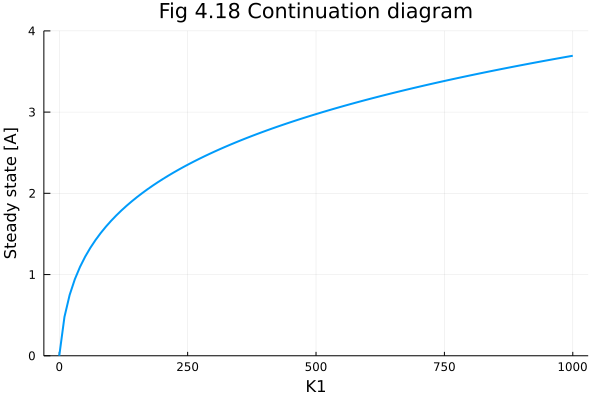

In [7]:
plot(k1Range, a, title = "Fig 4.18 Continuation diagram", xlabel = "K1" , ylabel= "Steady state [A]", leg=nothing, ylim=(0.0, 4.0))